<a href="https://colab.research.google.com/github/JorgeMarquezPiedra/Afluencia-Metro-Ciudad-de-Mexico-2010-a-2025-Python/blob/main/Afluencia_STC_Metro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Afluencia en STC Metro (Simple)

In [74]:
# Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [75]:
# Leer dataset
afluencia = pd.read_csv('afluenciastc_simple_01_2026.csv')
afluencia

,fecha,anio,mes,linea,estacion,afluencia
0,2010-01-01,2010,Enero,Linea 1,Zaragoza,20227
1,2010-01-01,2010,Enero,Linea 1,Isabel la CatÃ³lica,6487
2,2010-01-01,2010,Enero,Linea 1,Moctezuma,10304
3,2010-01-01,2010,Enero,Linea 1,Pino SuÃ¡rez,8679
4,2010-01-01,2010,Enero,Linea 1,GÃ³mez FarÃ­as,19499
...,...,...,...,...,...,...
1145620,2026-01-31,2026,Enero,Linea B,Romero Rubio,13187
1145621,2026-01-31,2026,Enero,Linea B,RÃ­o de los Remedios,12671
1145622,2026-01-31,2026,Enero,Linea B,San LÃ¡zaro,12116
1145623,2026-01-31,2026,Enero,Linea B,Tepito,20189


In [76]:
# Eliminar símbolos atípicos
import re
def fix_mojibake(text):
    if isinstance(text, str):
        text = text.replace('Ã¡', 'á')
        text = text.replace('Ã©', 'é')
        text = text.replace('Ã­', 'í')
        text = text.replace('Ã³', 'ó')
        text = text.replace('Ãº', 'ú')
        text = text.replace('Ã±', 'ñ')
        text = text.replace('Ã‘', 'Ñ')
        text = text.replace('Ãœ', 'Ü')
        text = text.replace('Ã ', 'Á')
        text = text.replace('Ã‰', 'É')
        text = text.replace('Ã ', 'Í')
        text = text.replace('Ã“', 'Ó')
        text = text.replace('Ãš', 'Ú')
        text = text.replace('â‚¬', '€')
        text = re.sub(r'â\x80\x93', '–', text)
        text = re.sub(r'â\x80\x94', '—', text)
        text = re.sub(r'â\x80\x98|â\x80\x99', "'", text)
        text = re.sub(r'â\x80\x9C|â\x80\x9D', '"', text)
        text = text.replace('Â', '')
    return text

# Reemplazar
afluencia['estacion'] = afluencia['estacion'].apply(fix_mojibake)
afluencia['linea'] = afluencia['linea'].apply(fix_mojibake)

# Verificar
print("Valores únicos en 'estacion' corregidos:")
print(afluencia['estacion'].unique())
print("\nValores únicos en 'linea' corregidos:")
print(afluencia['linea'].unique())

display(afluencia.head())

Valores únicos en 'estacion' corregidos:
['Zaragoza' 'Isabel la Católica' 'Moctezuma' 'Pino Suárez' 'Gómez Farías'
 'Deportivo 18 de Marzo' 'La Villa/Basílica' 'Pantitlán' 'Aculco'
 'Velódromo' 'Autobuses del Norte' 'Misterios' 'Constituyentes'
 'Refinería' 'Etiopía/Plaza de la Transparencia' 'Polanco'
 'Canal del Norte' 'Bondojito' 'Santa Anita' 'Popotla' 'General Anaya'
 'División del Norte' 'Zapata' 'Fray Servando' 'Hangares' 'El Rosario'
 'Ferrería/Arena Ciudad de México' 'Instituto del Petróleo' 'Coyuya'
 'Apatlaco' 'La Viga' 'Chabacano' 'San Juan de Letrán'
 'Barranca del Muerto' 'Garibaldi/Lagunilla' 'Buenavista' 'Guerrero'
 'Oceanía' 'Nezahualcóyotl' 'Revolución' 'Indios Verdes' 'Hidalgo'
 'Colegio Militar' 'Normal' 'San Cosme' 'Juárez' 'Olímpica'
 'Ciudad Azteca' 'Tlaltenco' 'Insurgentes Sur' 'Culhuacán' 'Calle 11'
 'Chilpancingo' 'Peñón Viejo' 'Canal de San Juan' 'Lomas Estrella'
 'San Andrés Tomatlán' 'Ermita' 'Xola' 'Salto del Agua' 'Balderas'
 'Portales' 'Eduardo Molina' '

,fecha,anio,mes,linea,estacion,afluencia
0,2010-01-01,2010,Enero,Linea 1,Zaragoza,20227
1,2010-01-01,2010,Enero,Linea 1,Isabel la Católica,6487
2,2010-01-01,2010,Enero,Linea 1,Moctezuma,10304
3,2010-01-01,2010,Enero,Linea 1,Pino Suárez,8679
4,2010-01-01,2010,Enero,Linea 1,Gómez Farías,19499


In [77]:
# Unificar los valores de 'linea' para que todos sean Línea
afluencia['linea'] = afluencia['linea'].str.replace('Linea', 'Línea', regex=False)

print("Valores únicos en 'linea' unificados:")
print(afluencia['linea'].unique())

Valores únicos en 'linea' unificados:
['Línea 1' 'Línea 6' 'Línea 9' 'Línea 8' 'Línea 5' 'Línea 7' 'Línea 3'
 'Línea 4' 'Línea 2' 'Línea B' 'Línea 12' 'Línea A']


In [78]:
# Información del dataset
afluencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145625 entries, 0 to 1145624
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   fecha      1145625 non-null  object
 1   anio       1145625 non-null  int64 
 2   mes        1145625 non-null  object
 3   linea      1145625 non-null  object
 4   estacion   1145625 non-null  object
 5   afluencia  1145625 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 52.4+ MB


In [79]:
# Estadísticas básicas del dataset
afluencia.describe()

,anio,afluencia
count,1.145625e+06,1.145625e+06
mean,2.017545e+03,1.967433e+04
std,4.638578e+00,1.940474e+04
min,2.010000e+03,0.000000e+00
25%,2.014000e+03,7.452000e+03
50%,2.018000e+03,1.445700e+04
75%,2.022000e+03,2.546300e+04
max,2.026000e+03,2.630560e+05


##Distribución de la afluencia

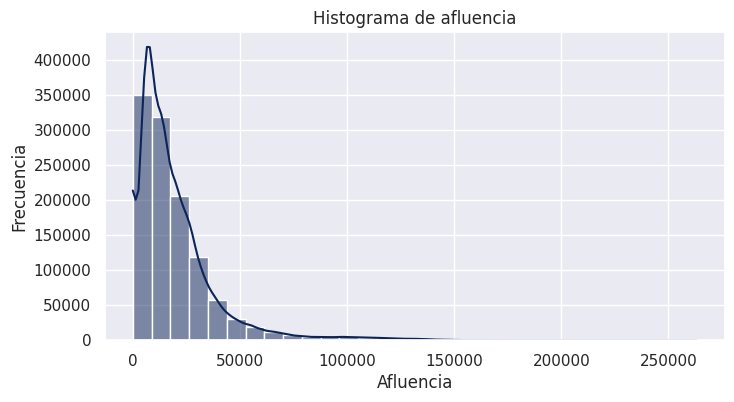

In [80]:
# Histograma de afluencia
plt.figure(figsize=(8, 4))
sns.set_theme()
sns.histplot(data = afluencia, x = 'afluencia', kde = True, bins = 30, color = '#0c2457')
plt.title('Histograma de afluencia')
plt.xlabel('Afluencia')
plt.ylabel('Frecuencia')
plt.show()

##Afluencia promedio por línea (histórico)

---



In [81]:
# Agrupar por línea y obtener el promedio
afluencia.groupby('linea')['afluencia'].mean().sort_values(ascending=False)

,afluencia
linea,
Línea 2,28082.160986
Línea 1,27269.563455
Línea 3,26695.801816
Línea 9,23034.899121
Línea A,22938.882928
Línea B,18509.517560
Línea 8,18201.878844
Línea 7,17457.426638
Línea 5,14945.000930


In [82]:
import re

# Definir manera personalizada de ordenar 'linea'
def sort_lineas(linea_name):
    # Extraer la parte posterior a "Línea "
    match = re.match(r'Línea (\d+|[A-Z])', linea_name)
    if match:
        identifier = match.group(1)
        if identifier.isdigit():
            return (0, int(identifier)) # Ordenar número (ej., 1, 2, 3...)
        else:
            return (1, identifier) # Ordenar letras después de números (e.g., A, B...)
    return (2, linea_name)

# Define paleta de colores
linea_color_map = {
    'Línea 1': '#e9468f',
    'Línea 2': '#00599f',
    'Línea 3': '#7c9a2a',
    'Línea 4': '#6cbab1',
    'Línea 5': '#fdd200',
    'Línea 6': '#da1715',
    'Línea 7': '#e97009',
    'Línea 8': '#008e3d',
    'Línea 9': '#5b352e',
    'Línea 12': '#c49955',
    'Línea A': '#9e1a81',
    'Línea B': '#bbb9b8'
}

# Ordenar las líneas usando la función personalizada
sorted_lines_for_plotting = sorted(linea_color_map.keys(), key=sort_lineas)

print("Color asignado para cada línea:")
for linea, color in linea_color_map.items():
    print(f"{linea}: {color}")

print("\nLineas ordenadas:")
print(sorted_lines_for_plotting)

Color asignado para cada línea:
Línea 1: #e9468f
Línea 2: #00599f
Línea 3: #7c9a2a
Línea 4: #6cbab1
Línea 5: #fdd200
Línea 6: #da1715
Línea 7: #e97009
Línea 8: #008e3d
Línea 9: #5b352e
Línea 12: #c49955
Línea A: #9e1a81
Línea B: #bbb9b8

Lineas ordenadas:
['Línea 1', 'Línea 2', 'Línea 3', 'Línea 4', 'Línea 5', 'Línea 6', 'Línea 7', 'Línea 8', 'Línea 9', 'Línea 12', 'Línea A', 'Línea B']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

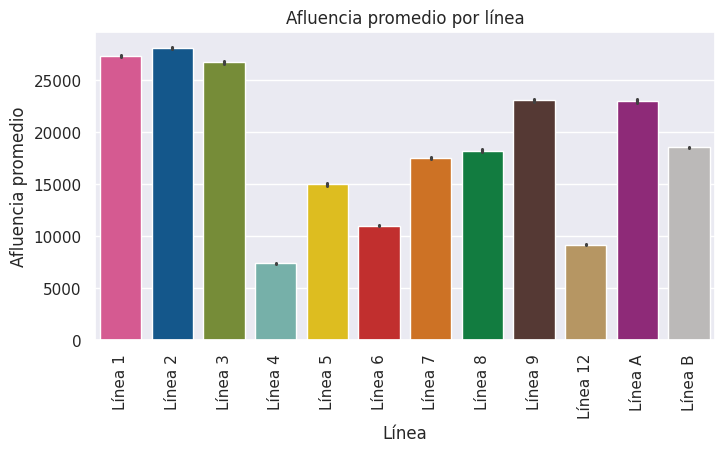

In [83]:
# Gráfica de afluencia promedio por línea
plt.figure(figsize=(8, 4))
sns.set_theme()
sns.barplot(
    data = afluencia,
    x = 'linea',
    y = 'afluencia',
    estimator = 'mean',
    hue = 'linea',
    palette = linea_color_map,
    order = sorted_lines_for_plotting,
    legend = False
)
plt.title('Afluencia promedio por línea')
plt.xlabel('Línea')
plt.ylabel('Afluencia promedio')
plt.xticks(rotation = 90)
plt

##Variables de tiempo

In [84]:
# Asegurar formato datetime en la columna fecha
afluencia['fecha'] = pd.to_datetime(afluencia['fecha'])
afluencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145625 entries, 0 to 1145624
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   fecha      1145625 non-null  datetime64[ns]
 1   anio       1145625 non-null  int64         
 2   mes        1145625 non-null  object        
 3   linea      1145625 non-null  object        
 4   estacion   1145625 non-null  object        
 5   afluencia  1145625 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 52.4+ MB


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

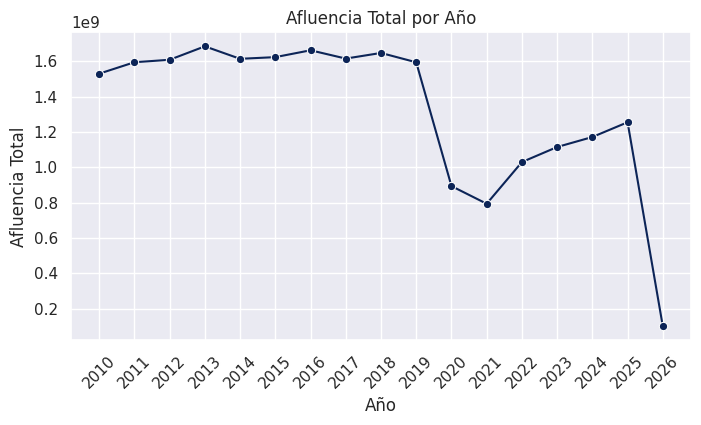

In [85]:
# Afluencia por año
afluencia_por_anio = afluencia.groupby('anio')['afluencia'].sum().reset_index()

# Gráfico de línea de afluencia por año
plt.figure(figsize=(8, 4))
sns.lineplot(data = afluencia_por_anio, x = 'anio', y = 'afluencia', marker = 'o', color = '#0c2457')
plt.title('Afluencia Total por Año')
plt.xlabel('Año')
plt.ylabel('Afluencia Total')
plt.xticks(afluencia_por_anio['anio'].unique(), rotation=45)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

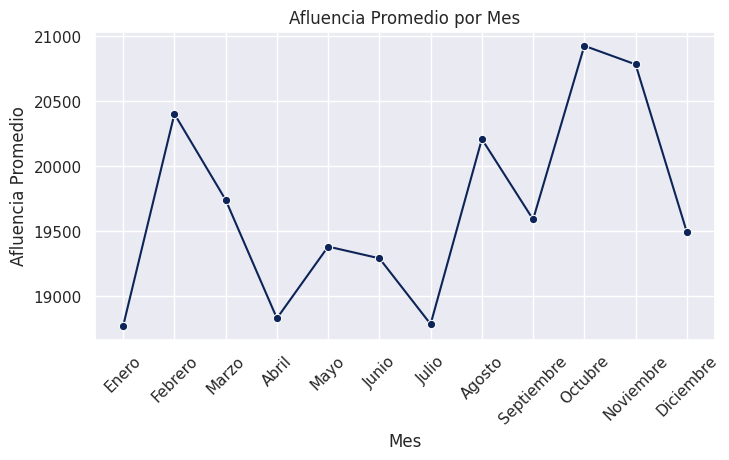

In [86]:
# Afluencia promedio por mes
afluencia_por_mes = afluencia.groupby('mes')['afluencia'].mean().reset_index()

# Definir el orden correcto de meses
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Ordenar el dataframe usando el orden de meses
afluencia_por_mes['mes'] = pd.Categorical(afluencia_por_mes['mes'], categories = orden_meses, ordered = True)
afluencia_por_mes = afluencia_por_mes.sort_values('mes')

# Gráfico de línea de afluencia promedio por mes
plt.figure(figsize=(8, 4))
sns.lineplot(data = afluencia_por_mes, x = 'mes', y = 'afluencia', marker = 'o', color = '#0c2457')
plt.title('Afluencia Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Afluencia Promedio')
plt.xticks(rotation=45)
plt

In [87]:
# Generar días de la semana para el dataframe
afluencia['dia_semana'] = afluencia['fecha'].dt.day_name()
afluencia

,fecha,anio,mes,linea,estacion,afluencia,dia_semana
0,2010-01-01,2010,Enero,Línea 1,Zaragoza,20227,Friday
1,2010-01-01,2010,Enero,Línea 1,Isabel la Católica,6487,Friday
2,2010-01-01,2010,Enero,Línea 1,Moctezuma,10304,Friday
3,2010-01-01,2010,Enero,Línea 1,Pino Suárez,8679,Friday
4,2010-01-01,2010,Enero,Línea 1,Gómez Farías,19499,Friday
...,...,...,...,...,...,...,...
1145620,2026-01-31,2026,Enero,Línea B,Romero Rubio,13187,Saturday
1145621,2026-01-31,2026,Enero,Línea B,Río de los Remedios,12671,Saturday
1145622,2026-01-31,2026,Enero,Línea B,San Lázaro,12116,Saturday
1145623,2026-01-31,2026,Enero,Línea B,Tepito,20189,Saturday


In [88]:
# Traducir los días de inglés a español
day_name_mapping = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Aplicar la traducción en la columna
afluencia['dia_semana'] = afluencia['dia_semana'].map(day_name_mapping)

afluencia

,fecha,anio,mes,linea,estacion,afluencia,dia_semana
0,2010-01-01,2010,Enero,Línea 1,Zaragoza,20227,Viernes
1,2010-01-01,2010,Enero,Línea 1,Isabel la Católica,6487,Viernes
2,2010-01-01,2010,Enero,Línea 1,Moctezuma,10304,Viernes
3,2010-01-01,2010,Enero,Línea 1,Pino Suárez,8679,Viernes
4,2010-01-01,2010,Enero,Línea 1,Gómez Farías,19499,Viernes
...,...,...,...,...,...,...,...
1145620,2026-01-31,2026,Enero,Línea B,Romero Rubio,13187,Sábado
1145621,2026-01-31,2026,Enero,Línea B,Río de los Remedios,12671,Sábado
1145622,2026-01-31,2026,Enero,Línea B,San Lázaro,12116,Sábado
1145623,2026-01-31,2026,Enero,Línea B,Tepito,20189,Sábado


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

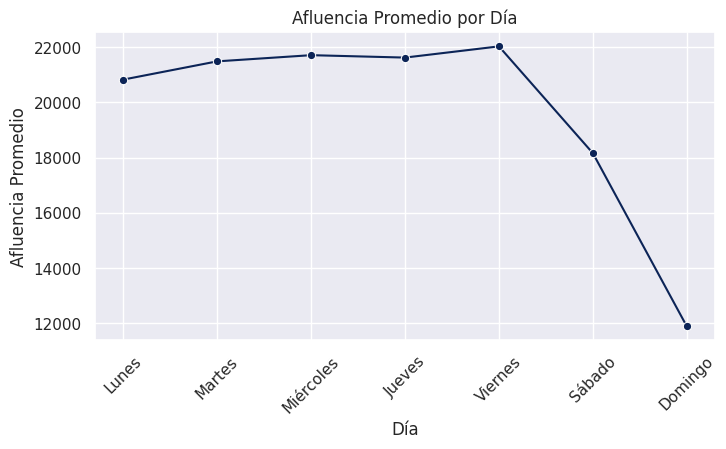

In [89]:
# Afluencia promedio por día
afluencia_por_dia = afluencia.groupby('dia_semana')['afluencia'].mean().reset_index()

# Definir el orden correcto de meses
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Ordenar el dataframe usando el orden de meses
afluencia_por_dia['dia_semana'] = pd.Categorical(afluencia_por_dia['dia_semana'], categories = orden_dias, ordered = True)
afluencia_por_dia = afluencia_por_dia.sort_values('dia_semana')

# Gráfico de línea de afluencia promedio por mes
plt.figure(figsize=(8, 4))
sns.lineplot(data = afluencia_por_dia, x = 'dia_semana', y = 'afluencia', marker = 'o', color = '#0c2457')
plt.title('Afluencia Promedio por Día')
plt.xlabel('Día')
plt.ylabel('Afluencia Promedio')
plt.xticks(rotation=45)
plt

##Variabilidad de afluencia por línea

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

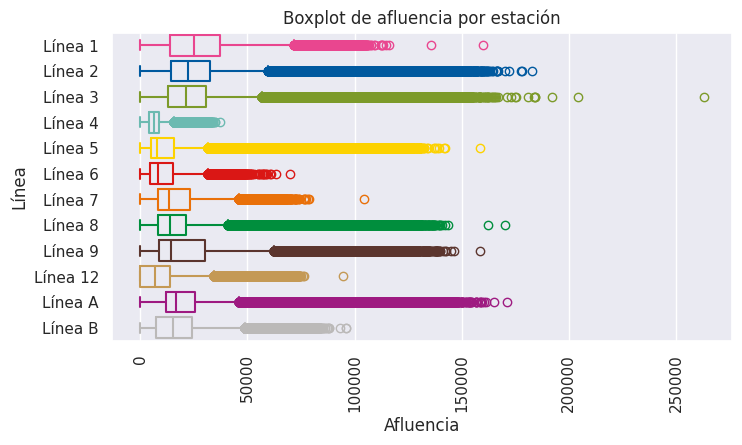

In [90]:
# Boxplot de afluencia por estación
plt.figure(figsize=(8, 4))
sns.set_theme()
sns.boxplot(
    data = afluencia,
    x = 'afluencia',
    y = 'linea',
    hue = 'linea',
    fill = False,
    palette = linea_color_map,
    order = sorted_lines_for_plotting,
    legend = False)
plt.title('Boxplot de afluencia por estación')
plt.xlabel('Afluencia')
plt.ylabel('Línea')
plt.xticks(rotation = 90)
plt

##Heatmap año vs mes

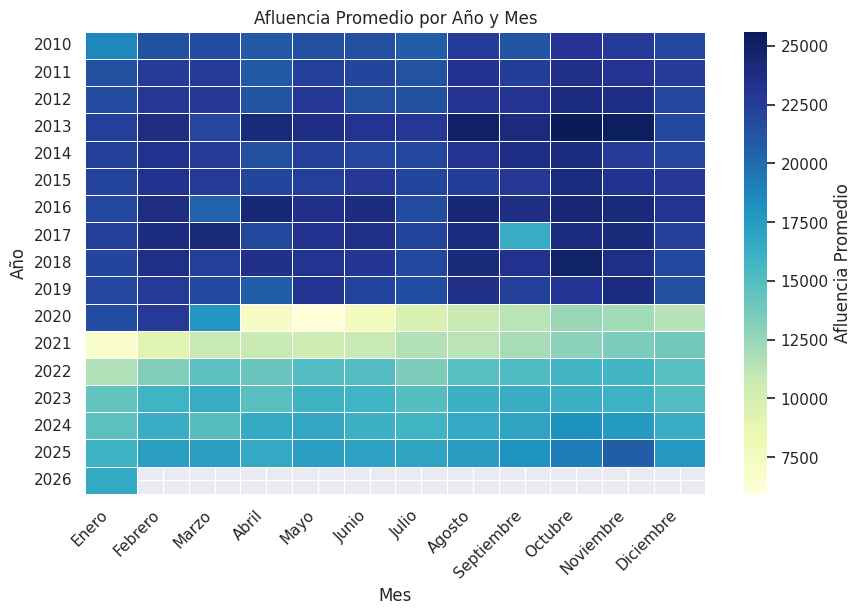

In [91]:
pivot = afluencia.pivot_table(values='afluencia', index='anio', columns='mes', aggfunc='mean')

# Ordenar los meses para el mapa
pivot = pivot[orden_meses]

plt.figure(figsize=(10, 6))
sns.set_theme()
sns.heatmap(pivot, cmap="YlGnBu", fmt=".0f", linewidths=.5, cbar_kws={'label': 'Afluencia Promedio'})
plt.title('Afluencia Promedio por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

#Afluencia en STC Metro (Desglosado)

In [92]:
# Leer dataset
afluencia_desg = pd.read_csv('afluenciastc_desglosado_01_2026.csv')
afluencia_desg

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia
0,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Boleto,1848
1,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Prepago,790
2,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Gratuidad,325
3,2021-01-01,Enero,2021,LÃ­nea 1,Balderas,Boleto,1103
4,2021-01-01,Enero,2021,LÃ­nea 1,Balderas,Prepago,922
...,...,...,...,...,...,...,...
1086340,2026-01-31,Enero,2026,Linea 12,Insurgentes Sur,Prepago,20311
1086341,2026-01-31,Enero,2026,Linea 12,Insurgentes Sur,Gratuidad,2393
1086342,2026-01-31,Enero,2026,Linea 12,Mixcoac,Boleto,0
1086343,2026-01-31,Enero,2026,Linea 12,Mixcoac,Prepago,8453


In [93]:
# Eliminar símbolos atípicos
import re
def fix_mojibake(text):
    if isinstance(text, str):
        text = text.replace('Ã¡', 'á')
        text = text.replace('Ã©', 'é')
        text = text.replace('Ã­', 'í')
        text = text.replace('Ã³', 'ó')
        text = text.replace('Ãº', 'ú')
        text = text.replace('Ã±', 'ñ')
        text = text.replace('Ã‘', 'Ñ')
        text = text.replace('Ãœ', 'Ü')
        text = text.replace('Ã ', 'Á')
        text = text.replace('Ã‰', 'É')
        text = text.replace('Ã ', 'Í')
        text = text.replace('Ã“', 'Ó')
        text = text.replace('Ãš', 'Ú')
        text = text.replace('â‚¬', '€')
        text = re.sub(r'â\x80\x93', '–', text)
        text = re.sub(r'â\x80\x94', '—', text)
        text = re.sub(r'â\x80\x98|â\x80\x99', "'", text)
        text = re.sub(r'â\x80\x9C|â\x80\x9D', '"', text)
        text = text.replace('Â', '')
    return text

# Reemplazar
afluencia_desg['estacion'] = afluencia_desg['estacion'].apply(fix_mojibake)
afluencia_desg['linea'] = afluencia_desg['linea'].apply(fix_mojibake)

print("Valores únicos en 'estacion' corregidos:")
print(afluencia_desg['estacion'].unique())
print("\nValores únicos en 'linea' corregidos:")
print(afluencia_desg['linea'].unique())

display(afluencia_desg.head())

Valores únicos en 'estacion' corregidos:
['Balbuena' 'Balderas' 'Boulevard Puerto Aéreo' 'Candelaria' 'Chapultepec'
 'Cuauhtémoc' 'Gómez Farías' 'Insurgentes' 'Isabel la Católica'
 'Juanacatlán' 'Merced' 'Moctezuma' 'Observatorio' 'Pantitlán'
 'Pino Suárez' 'Salto del Agua' 'San Lázaro' 'Sevilla' 'Tacubaya'
 'Zaragoza' 'Hospital 20 de Noviembre' 'Atlalilco' 'Calle 11' 'Culhuacán'
 'Eje Central' 'Ermita' 'Insurgentes Sur' 'Lomas Estrella' 'Mexicaltzingo'
 'Mixcoac' 'Nopalera' 'Olivos' 'Parque de los Venados'
 'Periférico Oriente' 'San Andrés Tomatlán' 'Tezonco' 'Tláhuac'
 'Tlaltenco' 'Zapata' 'Zapotitlán' 'Allende' 'Bellas Artes' 'Chabacano'
 'Colegio Militar' 'Cuatro Caminos' 'Cuitláhuac' 'General Anaya' 'Hidalgo'
 'Nativitas' 'Normal' 'Panteones' 'Popotla' 'Portales' 'Revolución'
 'San Antonio Abad' 'San Cosme' 'Tacuba' 'Tasqueña' 'Viaducto'
 'Villa de Cortés' 'Xola' 'Zócalo/Tenochtitlan' 'Centro Médico' 'Copilco'
 'Coyoacán' 'Deportivo 18 de Marzo' 'División del Norte'
 'Etiopía/Plaz

,fecha,mes,anio,linea,estacion,tipo_pago,afluencia
0,2021-01-01,Enero,2021,Línea 1,Balbuena,Boleto,1848
1,2021-01-01,Enero,2021,Línea 1,Balbuena,Prepago,790
2,2021-01-01,Enero,2021,Línea 1,Balbuena,Gratuidad,325
3,2021-01-01,Enero,2021,Línea 1,Balderas,Boleto,1103
4,2021-01-01,Enero,2021,Línea 1,Balderas,Prepago,922


In [94]:
# Convertir datos de fecha en datetime
afluencia_desg['fecha'] = pd.to_datetime(afluencia_desg['fecha'])
afluencia_desg['linea'] = afluencia_desg['linea'].str.replace('Linea', 'Línea', regex=False)

print("Valores únicos en 'linea' unificados en afluencia_desg:")
print(afluencia_desg['linea'].unique())

afluencia_desg.info()

Valores únicos en 'linea' unificados en afluencia_desg:
['Línea 1' 'Línea 12' 'Línea 2' 'Línea 3' 'Línea 4' 'Línea 5' 'Línea 6'
 'Línea 7' 'Línea 8' 'Línea 9' 'Línea A' 'Línea B']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086345 entries, 0 to 1086344
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   fecha      1086345 non-null  datetime64[ns]
 1   mes        1086345 non-null  object        
 2   anio       1086345 non-null  int64         
 3   linea      1086345 non-null  object        
 4   estacion   1086345 non-null  object        
 5   tipo_pago  1086345 non-null  object        
 6   afluencia  1086345 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 58.0+ MB


In [95]:
# Crear los días de la semana en el dataframe desglosado
afluencia_desg['dia_semana'] = afluencia_desg['fecha'].dt.day_name()
afluencia_desg['dia_semana'] = afluencia_desg['dia_semana'].map(day_name_mapping)

print(afluencia_desg['dia_semana'].unique())
afluencia_desg

['Viernes' 'Sábado' 'Domingo' 'Lunes' 'Martes' 'Miércoles' 'Jueves']


,fecha,mes,anio,linea,estacion,tipo_pago,afluencia,dia_semana
0,2021-01-01,Enero,2021,Línea 1,Balbuena,Boleto,1848,Viernes
1,2021-01-01,Enero,2021,Línea 1,Balbuena,Prepago,790,Viernes
2,2021-01-01,Enero,2021,Línea 1,Balbuena,Gratuidad,325,Viernes
3,2021-01-01,Enero,2021,Línea 1,Balderas,Boleto,1103,Viernes
4,2021-01-01,Enero,2021,Línea 1,Balderas,Prepago,922,Viernes
...,...,...,...,...,...,...,...,...
1086340,2026-01-31,Enero,2026,Línea 12,Insurgentes Sur,Prepago,20311,Sábado
1086341,2026-01-31,Enero,2026,Línea 12,Insurgentes Sur,Gratuidad,2393,Sábado
1086342,2026-01-31,Enero,2026,Línea 12,Mixcoac,Boleto,0,Sábado
1086343,2026-01-31,Enero,2026,Línea 12,Mixcoac,Prepago,8453,Sábado


In [96]:
# Acomodar orden de columnas del nuevo dataframe
afluencia_desg_processed = afluencia_desg.groupby(['fecha', 'anio', 'mes', 'linea', 'estacion', 'dia_semana'])['afluencia'].sum().reset_index()

print("Afluencia desglosada procesada (primeras 5 filas):")
afluencia_desg_processed

Afluencia desglosada procesada (primeras 5 filas):


,fecha,anio,mes,linea,estacion,dia_semana,afluencia
0,2021-01-01,2021,Enero,Línea 1,Balbuena,Viernes,2963
1,2021-01-01,2021,Enero,Línea 1,Balderas,Viernes,2676
2,2021-01-01,2021,Enero,Línea 1,Boulevard Puerto Aéreo,Viernes,8740
3,2021-01-01,2021,Enero,Línea 1,Candelaria,Viernes,2732
4,2021-01-01,2021,Enero,Línea 1,Chapultepec,Viernes,7584
...,...,...,...,...,...,...,...
362110,2026-01-31,2026,Enero,Línea B,Romero Rubio,Sábado,13187
362111,2026-01-31,2026,Enero,Línea B,Río de los Remedios,Sábado,12671
362112,2026-01-31,2026,Enero,Línea B,San Lázaro,Sábado,12116
362113,2026-01-31,2026,Enero,Línea B,Tepito,Sábado,20189


In [97]:
# Filtrar el dataframe afluencia para conservar únicamente datos de año 2020 hacia atrás
afluencia_filtered_simple = afluencia[afluencia['anio'] <= 2020]

print("Afluencia filtrada hasta 2020 (primeras 5 filas):")
afluencia_filtered_simple

Afluencia filtrada hasta 2020 (primeras 5 filas):


,fecha,anio,mes,linea,estacion,afluencia,dia_semana
0,2010-01-01,2010,Enero,Línea 1,Zaragoza,20227,Viernes
1,2010-01-01,2010,Enero,Línea 1,Isabel la Católica,6487,Viernes
2,2010-01-01,2010,Enero,Línea 1,Moctezuma,10304,Viernes
3,2010-01-01,2010,Enero,Línea 1,Pino Suárez,8679,Viernes
4,2010-01-01,2010,Enero,Línea 1,Gómez Farías,19499,Viernes
...,...,...,...,...,...,...,...
783505,2020-12-31,2020,Diciembre,Línea 12,Parque de los Venados,3020,Jueves
783506,2020-12-31,2020,Diciembre,Línea 12,Zapata,4126,Jueves
783507,2020-12-31,2020,Diciembre,Línea 12,Hospital 20 de Noviembre,3526,Jueves
783508,2020-12-31,2020,Diciembre,Línea 12,Insurgentes Sur,8778,Jueves


In [98]:
# Combinar ambos dataframes en uno solo llamado afluencia final
afluencia_final = pd.concat([afluencia_filtered_simple, afluencia_desg_processed], ignore_index=True)
afluencia_final

,fecha,anio,mes,linea,estacion,afluencia,dia_semana
0,2010-01-01,2010,Enero,Línea 1,Zaragoza,20227,Viernes
1,2010-01-01,2010,Enero,Línea 1,Isabel la Católica,6487,Viernes
2,2010-01-01,2010,Enero,Línea 1,Moctezuma,10304,Viernes
3,2010-01-01,2010,Enero,Línea 1,Pino Suárez,8679,Viernes
4,2010-01-01,2010,Enero,Línea 1,Gómez Farías,19499,Viernes
...,...,...,...,...,...,...,...
1145620,2026-01-31,2026,Enero,Línea B,Romero Rubio,13187,Sábado
1145621,2026-01-31,2026,Enero,Línea B,Río de los Remedios,12671,Sábado
1145622,2026-01-31,2026,Enero,Línea B,San Lázaro,12116,Sábado
1145623,2026-01-31,2026,Enero,Línea B,Tepito,20189,Sábado


##Distribución de la afluencia (completo)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

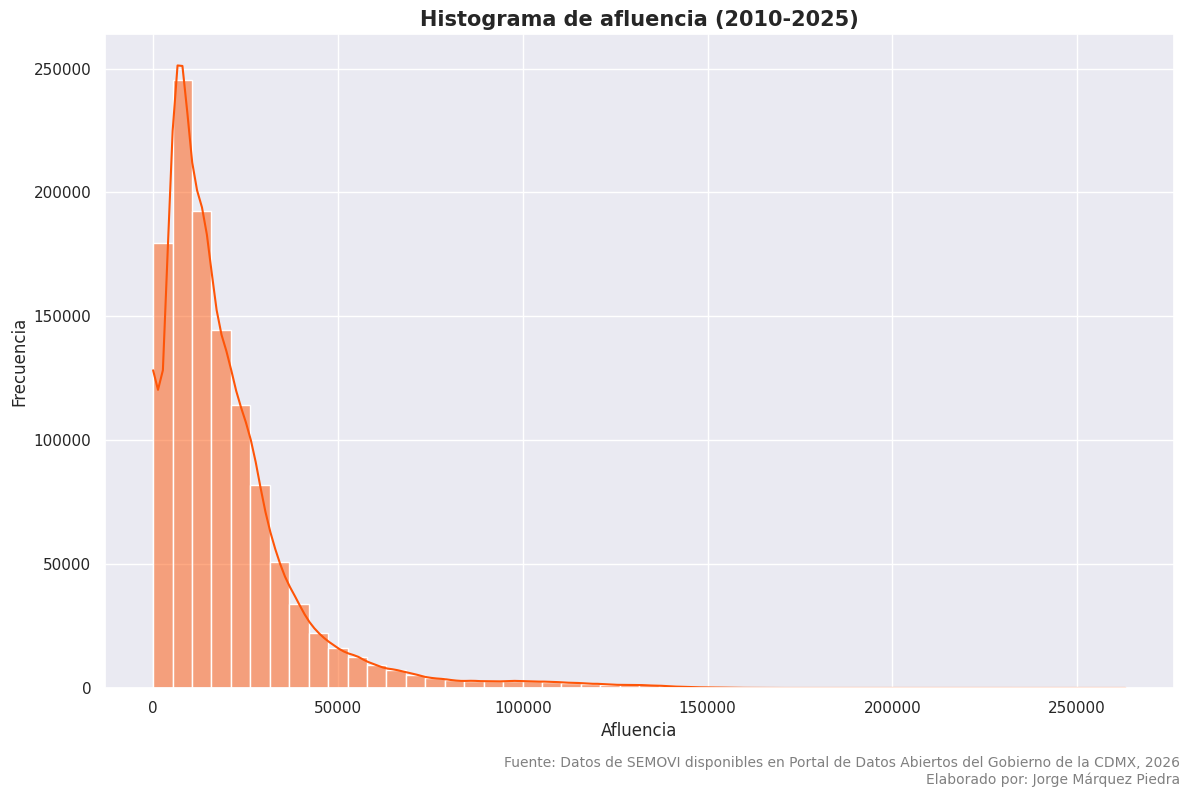

In [99]:
# Histograma de afluencia
plt.figure(figsize=(12, 8))
sns.set_theme()
sns.histplot(data = afluencia_final, x = 'afluencia', kde = True, bins = 50, color = '#fe5508')
plt.title('Histograma de afluencia (2010-2025)', fontsize = 15, fontweight = 'bold')
plt.xlabel('Afluencia')
plt.ylabel('Frecuencia')
plt.figtext(0.99, 0.01, 'Fuente: Datos de SEMOVI disponibles en Portal de Datos Abiertos del Gobierno de la CDMX, 2026\nElaborado por: Jorge Márquez Piedra', horizontalalignment='right', fontsize=10, color='gray')
plt.tight_layout()
plt.subplots_adjust(bottom = 0.13)
plt.savefig('histograma_afluencia.png', dpi = 300)
plt

##Afluencia promedio por línea (histórico)

In [100]:
import re

# Definir manera personalizada de ordenar 'linea'
def sort_lineas(linea_name):
    # Extraer la parte posterior a "Línea "
    match = re.match(r'Línea (\d+|[A-Z])', linea_name)
    if match:
        identifier = match.group(1)
        if identifier.isdigit():
            return (0, int(identifier)) # Ordenar número (ej., 1, 2, 3...)
        else:
            return (1, identifier) # Ordenar letras después de números (e.g., A, B...)
    return (2, linea_name)

# Define paleta de colores
linea_color_map = {
    'Línea 1': '#e9468f',
    'Línea 2': '#00599f',
    'Línea 3': '#7c9a2a',
    'Línea 4': '#6cbab1',
    'Línea 5': '#fdd200',
    'Línea 6': '#da1715',
    'Línea 7': '#e97009',
    'Línea 8': '#008e3d',
    'Línea 9': '#5b352e',
    'Línea 12': '#c49955',
    'Línea A': '#9e1a81',
    'Línea B': '#bbb9b8'
}

# Ordenar las líneas usando la función personalizada
sorted_lines_for_plotting = sorted(linea_color_map.keys(), key=sort_lineas)

print("Color asignado para cada línea:")
for linea, color in linea_color_map.items():
    print(f"{linea}: {color}")

print("\nLineas ordenadas:")
print(sorted_lines_for_plotting)

Color asignado para cada línea:
Línea 1: #e9468f
Línea 2: #00599f
Línea 3: #7c9a2a
Línea 4: #6cbab1
Línea 5: #fdd200
Línea 6: #da1715
Línea 7: #e97009
Línea 8: #008e3d
Línea 9: #5b352e
Línea 12: #c49955
Línea A: #9e1a81
Línea B: #bbb9b8

Lineas ordenadas:
['Línea 1', 'Línea 2', 'Línea 3', 'Línea 4', 'Línea 5', 'Línea 6', 'Línea 7', 'Línea 8', 'Línea 9', 'Línea 12', 'Línea A', 'Línea B']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

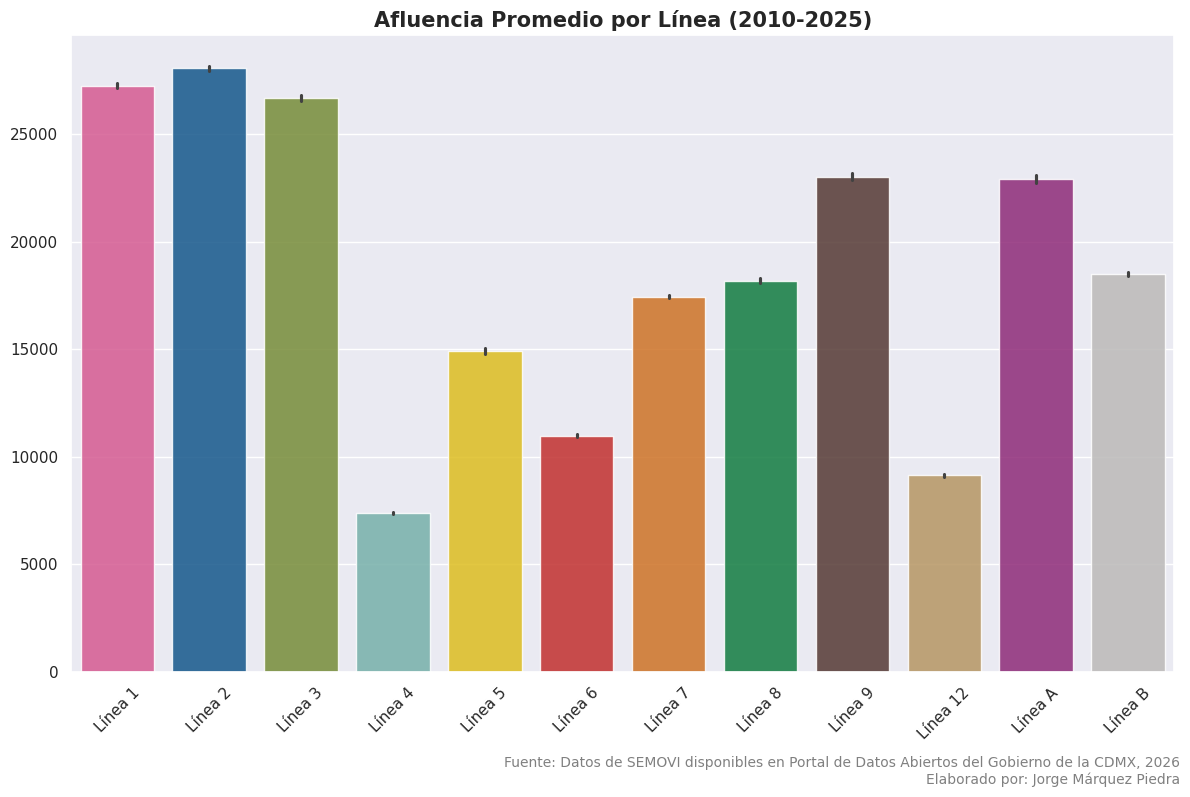

In [101]:
# Gráfica de afluencia promedio por línea
plt.figure(figsize=(12, 8))
sns.set_theme()
sns.barplot(
    data = afluencia_final,
    x = 'linea',
    y = 'afluencia',
    estimator = 'mean',
    hue = 'linea',
    palette = linea_color_map,
    alpha = 0.85,
    order = sorted_lines_for_plotting,
    legend = False
)
plt.title('Afluencia Promedio por Línea (2010-2025)', fontsize = 15, fontweight = 'bold')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 45)
plt.figtext(0.99, 0.01, 'Fuente: Datos de SEMOVI disponibles en Portal de Datos Abiertos del Gobierno de la CDMX, 2026\nElaborado por: Jorge Márquez Piedra', horizontalalignment='right', fontsize=10, color='gray')
plt.tight_layout()
plt.subplots_adjust(bottom = 0.15)
plt.savefig('afluencia_promedio_por_linea.png', dpi = 300)
plt

##Variables de tiempo

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

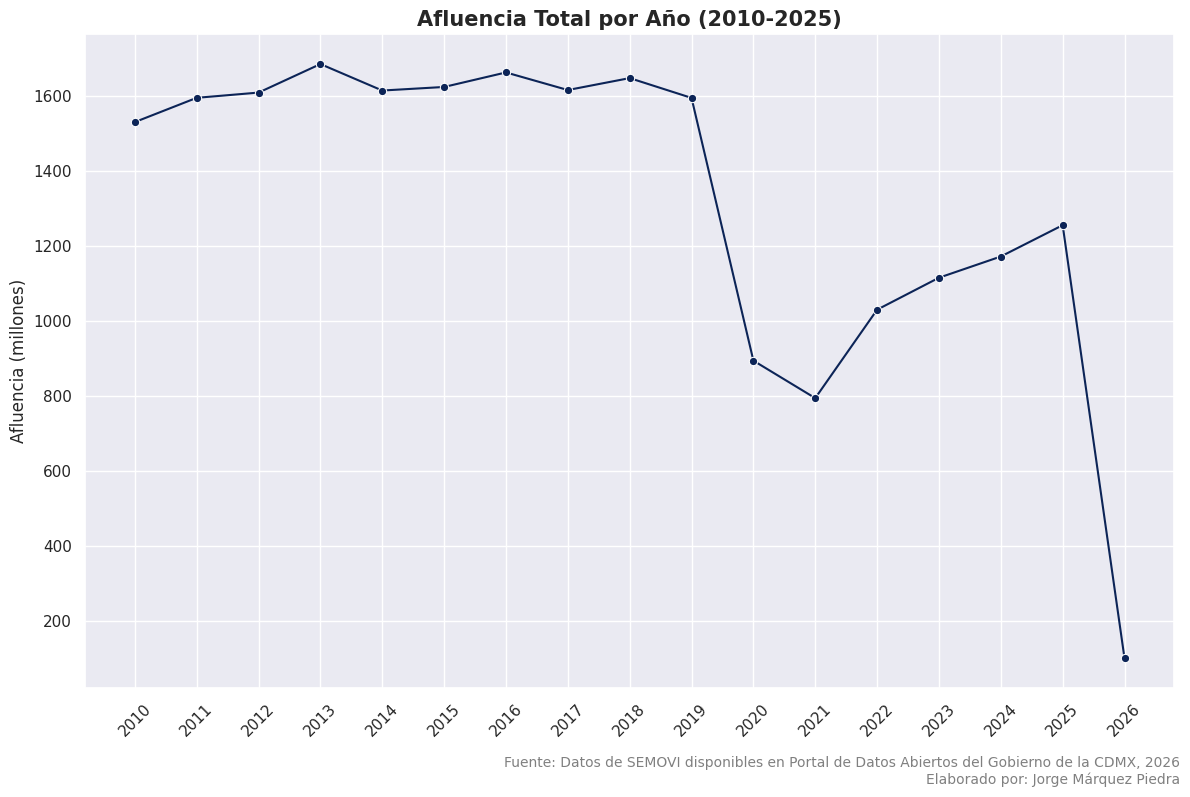

In [102]:
# Afluencia por año
afluencia_por_anio = afluencia_final.groupby('anio')['afluencia'].sum().reset_index()

# Convertir a millones
afluencia_por_anio['afluencia_millones'] = afluencia_por_anio['afluencia'] / 1_000_000

# Gráfico de línea de afluencia por año
plt.figure(figsize=(12, 8))
sns.lineplot(data = afluencia_por_anio, x = 'anio', y = 'afluencia_millones', marker = 'o', color = '#0c2457')
plt.title('Afluencia Total por Año (2010-2025)', fontsize = 15, fontweight = 'bold')
plt.xlabel(None)
plt.ylabel('Afluencia (millones)')
plt.xticks(afluencia_por_anio['anio'].unique(), rotation=45)
plt.figtext(0.99, 0.01, 'Fuente: Datos de SEMOVI disponibles en Portal de Datos Abiertos del Gobierno de la CDMX, 2026\nElaborado por: Jorge Márquez Piedra', horizontalalignment='right', fontsize=10, color='gray')
plt.tight_layout()
plt.subplots_adjust(bottom = 0.13)
plt.savefig('afluencia_total_por_año.png', dpi = 300)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

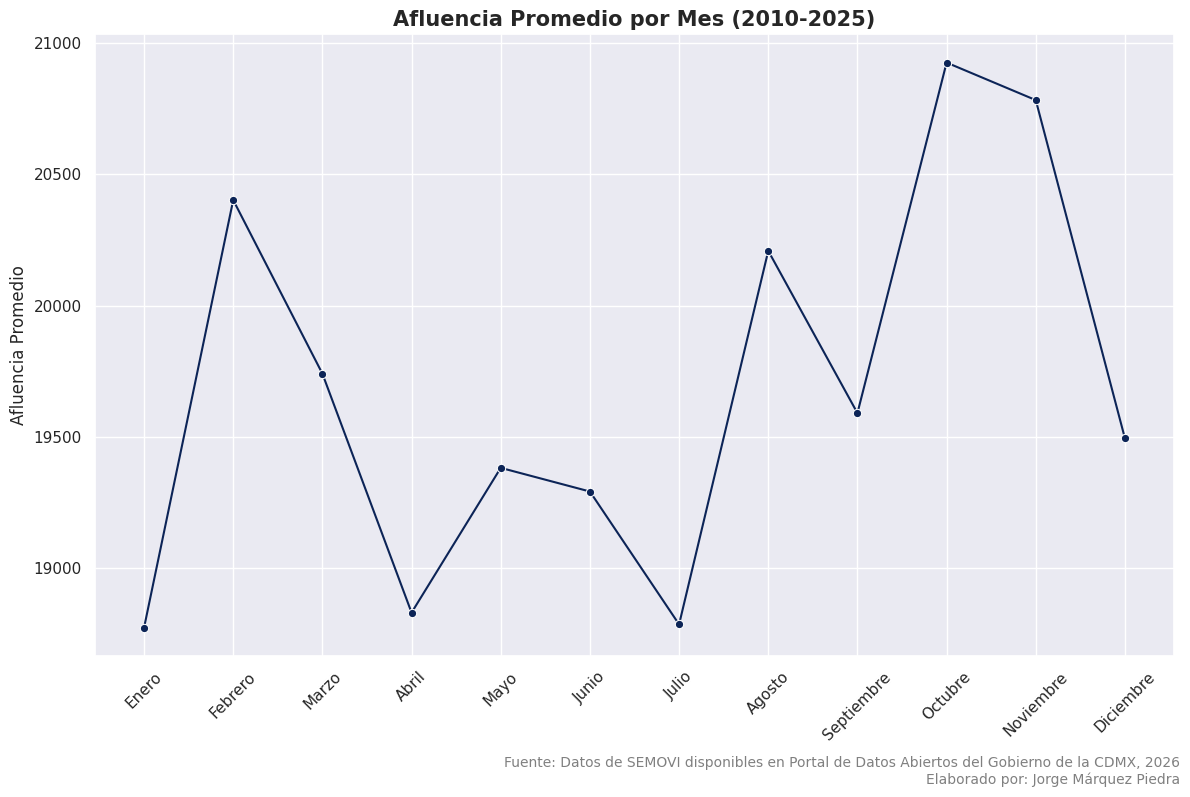

In [103]:
# Afluencia promedio por mes
afluencia_por_mes = afluencia_final.groupby('mes')['afluencia'].mean().reset_index()

# Definir el orden correcto de meses
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Ordenar el dataframe usando el orden de meses
afluencia_por_mes['mes'] = pd.Categorical(afluencia_por_mes['mes'], categories = orden_meses, ordered = True)
afluencia_por_mes = afluencia_por_mes.sort_values('mes')

# Gráfico de línea de afluencia promedio por mes
plt.figure(figsize=(12, 8))
sns.lineplot(data = afluencia_por_mes, x = 'mes', y = 'afluencia', marker = 'o', color = '#0c2457')
plt.title('Afluencia Promedio por Mes (2010-2025)', fontsize = 15, fontweight = 'bold')
plt.xlabel(None)
plt.ylabel('Afluencia Promedio')
plt.xticks(rotation=45)
plt.figtext(0.99, 0.01, 'Fuente: Datos de SEMOVI disponibles en Portal de Datos Abiertos del Gobierno de la CDMX, 2026\nElaborado por: Jorge Márquez Piedra', horizontalalignment='right', fontsize=10, color='gray')
plt.tight_layout()
plt.subplots_adjust(bottom = 0.17)
plt.savefig('afluencia_por_mes.png', dpi = 300)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

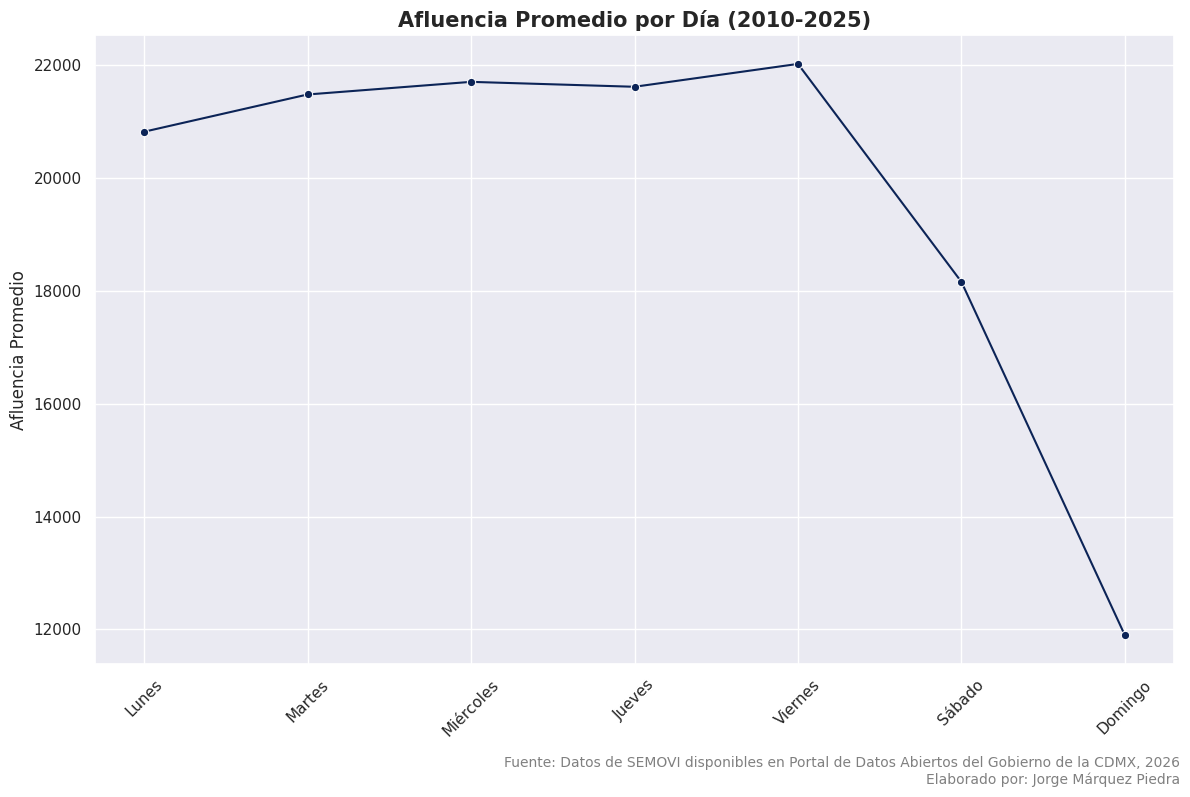

In [104]:
# Afluencia promedio por día
afluencia_por_dia = afluencia_final.groupby('dia_semana')['afluencia'].mean().reset_index()

# Definir el orden correcto de meses
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Ordenar el dataframe usando el orden de meses
afluencia_por_dia['dia_semana'] = pd.Categorical(afluencia_por_dia['dia_semana'], categories = orden_dias, ordered = True)
afluencia_por_dia = afluencia_por_dia.sort_values('dia_semana')

# Gráfico de línea de afluencia promedio por mes
plt.figure(figsize=(12, 8))
sns.lineplot(data = afluencia_por_dia, x = 'dia_semana', y = 'afluencia', marker = 'o', color = '#0c2457')
plt.title('Afluencia Promedio por Día (2010-2025)', fontsize = 15, fontweight = 'bold')
plt.xlabel(None)
plt.ylabel('Afluencia Promedio')
plt.xticks(rotation=45)
plt.figtext(0.99, 0.01, 'Fuente: Datos de SEMOVI disponibles en Portal de Datos Abiertos del Gobierno de la CDMX, 2026\nElaborado por: Jorge Márquez Piedra', horizontalalignment='right', fontsize=10, color='gray')
plt.tight_layout()
plt.subplots_adjust(bottom = 0.16)
plt.savefig('afluencia_por_dia.png', dpi = 300)
plt

##Variabilidad de afluencia por línea

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

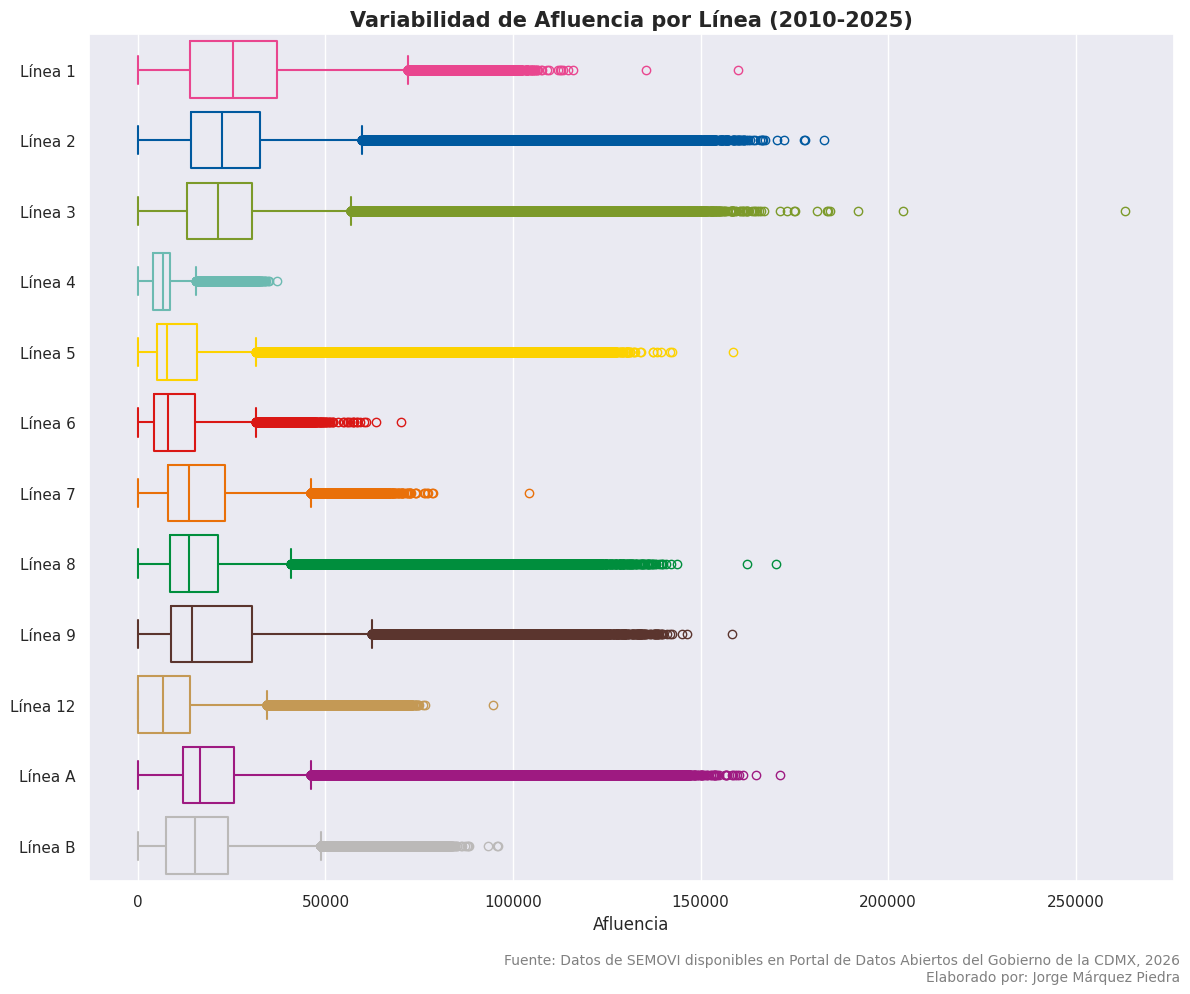

In [105]:
# Boxplot de afluencia por estación
plt.figure(figsize=(12, 10))
sns.set_theme()
sns.boxplot(
    data = afluencia_final,
    x = 'afluencia',
    y = 'linea',
    hue = 'linea',
    fill = False,
    palette = linea_color_map,
    order = sorted_lines_for_plotting,
    legend = False)
plt.title('Variabilidad de Afluencia por Línea (2010-2025)', fontsize = 15, fontweight = 'bold')
plt.xlabel('Afluencia')
plt.ylabel(None)
plt.xticks()
plt.figtext(0.99, 0.01, 'Fuente: Datos de SEMOVI disponibles en Portal de Datos Abiertos del Gobierno de la CDMX, 2026\nElaborado por: Jorge Márquez Piedra', horizontalalignment='right', fontsize=10, color='gray')
plt.tight_layout()
plt.subplots_adjust(bottom = 0.11)
plt.savefig('boxplot_por_linea.png', dpi = 300)
plt

##Heatmap año vs mes

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

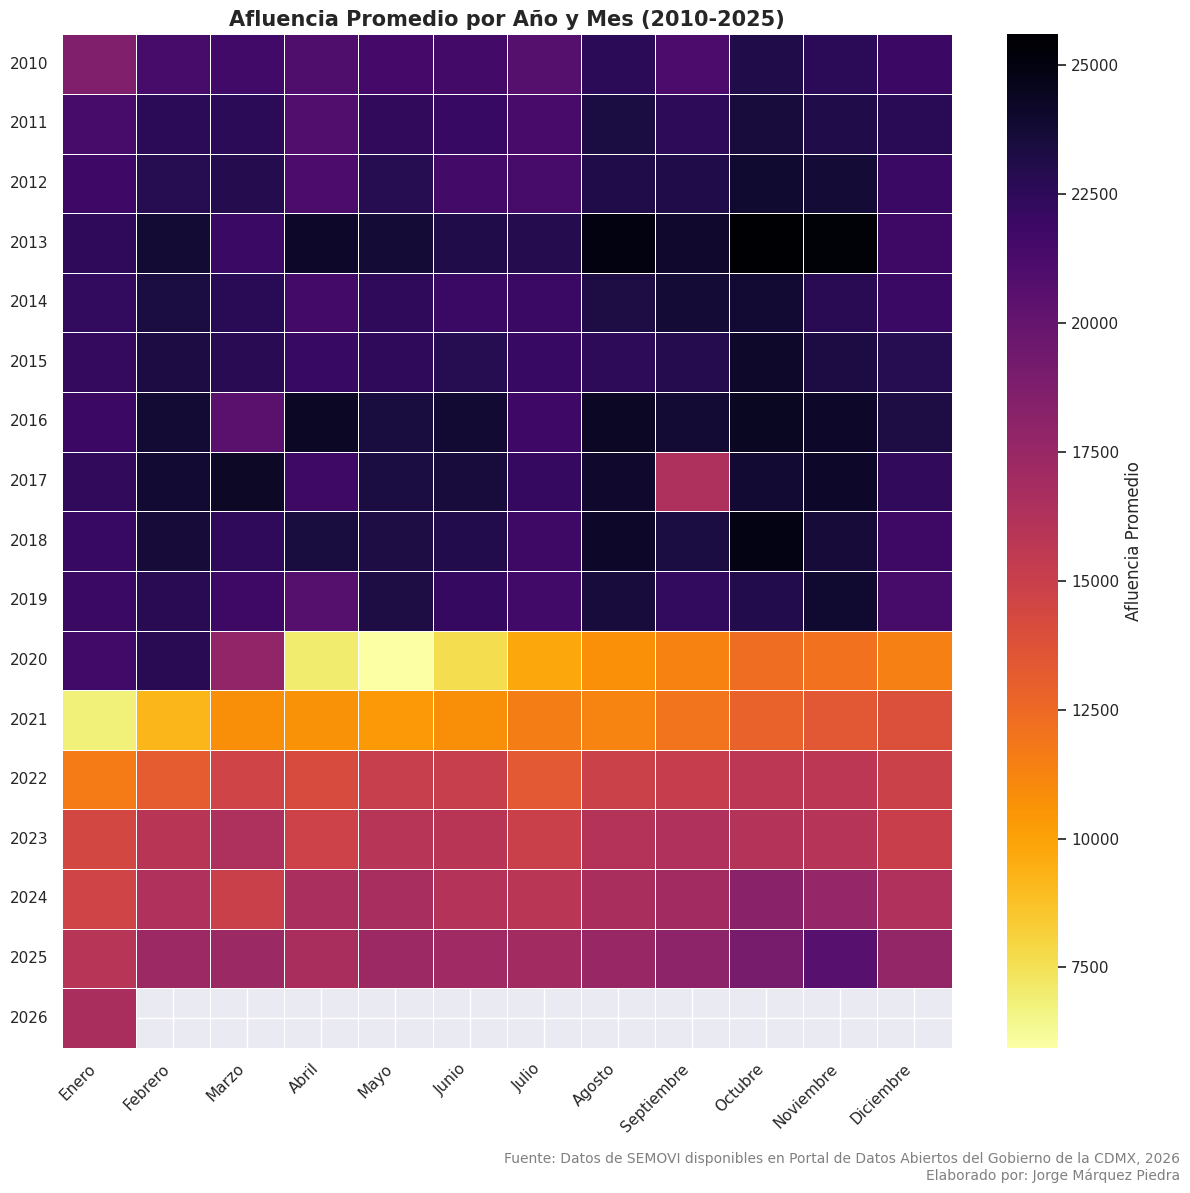

In [106]:
pivot = afluencia_final.pivot_table(values='afluencia', index='anio', columns='mes', aggfunc='mean')

# Ordenar los meses para el mapa
pivot = pivot[orden_meses]

plt.figure(figsize=(12, 12))
sns.set_theme()
sns.heatmap(pivot, cmap = "inferno_r", fmt = ".0f", linewidths = .5, cbar_kws = {'label': 'Afluencia Promedio'})
plt.title('Afluencia Promedio por Año y Mes (2010-2025)', fontsize = 15, fontweight = 'bold')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 0)
plt.figtext(0.99, 0.01, 'Fuente: Datos de SEMOVI disponibles en Portal de Datos Abiertos del Gobierno de la CDMX, 2026\nElaborado por: Jorge Márquez Piedra', horizontalalignment='right', fontsize=10, color='gray')
plt.tight_layout()
plt.subplots_adjust(bottom = 0.12)
plt.savefig('afluencia_heatmap_anio_mes.png', dpi = 300)
plt